In [53]:
import tensorflow as tf
from tensorflow import keras

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [55]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [56]:
df= pd.read_csv("accent-mfcc-data-1.csv")

In [57]:
df_copy=df.copy()

In [58]:
df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [59]:
# transformation
df['language'].value_counts()

US    165
UK     45
FR     30
GE     30
IT     30
ES     29
Name: language, dtype: int64

In [60]:
y= df['language']

In [63]:
y

0      ES
1      ES
2      ES
3      ES
4      ES
       ..
324    US
325    US
326    US
327    US
328    US
Name: language, Length: 329, dtype: object

In [61]:
# Encode the accent labels into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [62]:
df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [26]:
# training and testing
feature_cols=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12']
feature_inst=['language_ES','language_FR','language_GE','language_IT','language_UK','language_US']
x=df[feature_cols]
y=df[feature_inst]

In [66]:
x_train,x_test,y_train, y_test= train_test_split(x,y_encoded, test_size=0.1, random_state=1)

In [67]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0,1),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [34]:
tf.compat.v1.disable_eager_execution()

In [68]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
)

In [69]:
model.fit(x_train,y_train, epochs=10)

Train on 296 samples
Epoch 1/10
296/296 [==============================] - 0s 1ms/sample - loss: 2.7658 - accuracy: 0.2500
Epoch 2/10
296/296 [==============================] - 0s 57us/sample - loss: 1.5602 - accuracy: 0.5135
Epoch 3/10
296/296 [==============================] - 0s 57us/sample - loss: 1.2866 - accuracy: 0.5270
Epoch 4/10
296/296 [==============================] - 0s 57us/sample - loss: 1.1489 - accuracy: 0.6216
Epoch 5/10
296/296 [==============================] - 0s 47us/sample - loss: 1.0391 - accuracy: 0.6115
Epoch 6/10
296/296 [==============================] - 0s 54us/sample - loss: 0.9551 - accuracy: 0.6689
Epoch 7/10
296/296 [==============================] - 0s 52us/sample - loss: 0.8882 - accuracy: 0.7027
Epoch 8/10
296/296 [==============================] - 0s 52us/sample - loss: 0.8387 - accuracy: 0.7061
Epoch 9/10
296/296 [==============================] - 0s 60us/sample - loss: 0.7957 - accuracy: 0.7432
Epoch 10/10
296/296 [==============================] 

In [70]:
y_pred= np.argmax(model.predict(x_test),axis=1)
accuracy= accuracy_score(y_test, y_pred)
print("accuracy",accuracy)

C:\Users\Dell\anaconda3\lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


accuracy 0.696969696969697


In [80]:
n_classes=6

In [97]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc

In [103]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred==i)
    roc_auc[i] = auc(fpr[i], tpr[i])

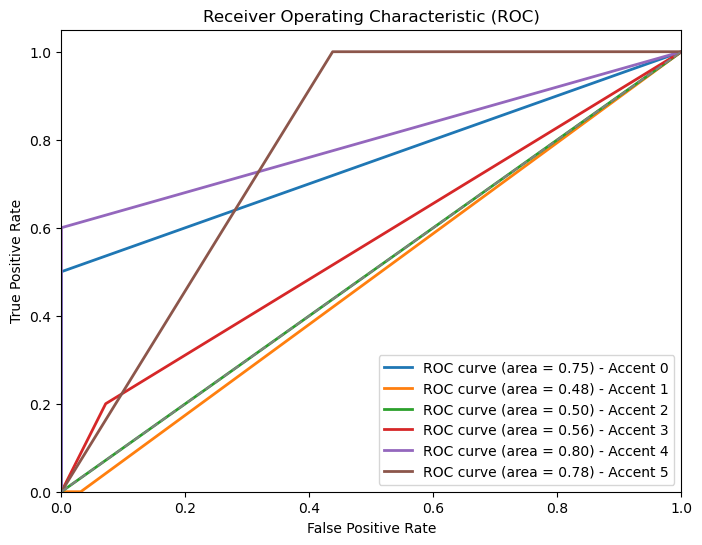

In [104]:
# Plot ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(6):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) - Accent %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [105]:
df['language'].value_counts()

US    165
UK     45
FR     30
GE     30
IT     30
ES     29
Name: language, dtype: int64

In [110]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

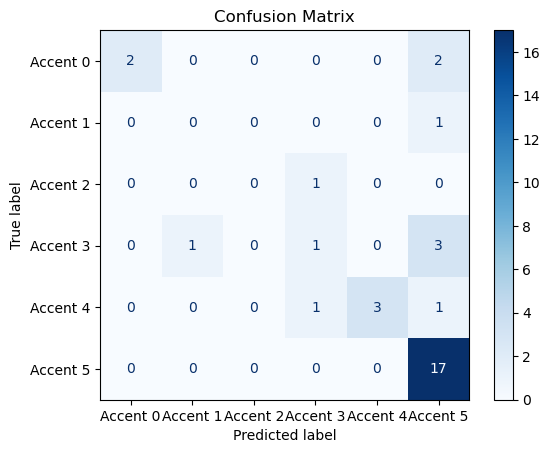

In [111]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Accent 0', 'Accent 1', 'Accent 2', 'Accent 3', 'Accent 4', 'Accent 5'])
disp.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix')
plt.show()

In [113]:
y_test.shape

(33,)